### RED NEURONAL
#### Cojunto de Datos... Keras.MNIST 

##### Librerias

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout,Flatten, BatchNormalization
from keras.models import Sequential , load_model
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

#### Cargando conjunto de Datos para Entrenamiento y Prueba del modelo

In [128]:
(X_train, y_train), (x_test, y_test) = mnist.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


#### Dividiendo conjunto de datos de entrenamiento a entrenamiento y validacion

In [129]:
x_valid, x_train = X_train[:10000], X_train[10000:]
y_valid, y_train = y_train[:10000], y_train[10000:]

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Train_val: X=%s, y=%s' % (x_valid.shape, y_valid.shape))

#Ahora contamos con 50k imagenes para el entrenamiento y 10k para la validacion simultanea en el modelo.

Train: X=(50000, 28, 28), y=(50000,)
Train_val: X=(10000, 28, 28), y=(10000,)


#### Visualizando las primeras 9 imagenes

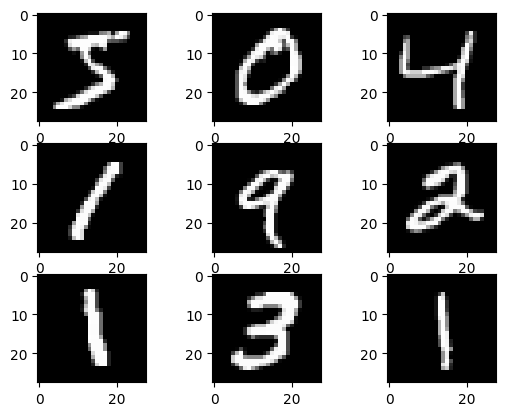

In [130]:

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
	
plt.show()

#### Procesamiento de Datos

In [131]:
#Si no se usa una capa Flatten es necesario transformar los datos de entrada(imagenes) de 2D a 1D
#esto se consigue multiplicando las dimensiones 28 x 28 pixeles = 784 pixeles

num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_valid = x_valid.reshape(x_valid.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')


print('Numero de pixeles : {:.0f}'.format(num_pixels))

Numero de pixeles : 784


In [132]:
# Normalizamos las entradas ya que lo valores pixeles se representan en una matriz desde 0-255 la pasamos a  0-1
x_train = x_train / 255
x_valid = x_valid / 255
x_test = x_test / 255

In [133]:
# Una codificacion de categoria (0-9) a One Hot a la salida.
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

print('Numero de etiquetas: {:.0f}'.format(y_train.shape[1]))

Numero de etiquetas: 10


#### Definicion del modelos y las capas

In [134]:
modelo = Sequential()
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal", input_dim = num_pixels))
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo.add(Dense(10, activation  = 'softmax'))

In [135]:
modelo.compile(optimizer= Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


#### Entrenamiento

In [136]:
EarlyStopping_monitor = EarlyStopping(patience = 3, monitor= "val_loss")
model = modelo.fit(x_train,y_train, validation_data= (x_valid,y_valid),batch_size= 512 ,epochs = 100,callbacks= [EarlyStopping_monitor])

Epoch 1/100
98/98 [==============================] - 2s 11ms/step - loss: 0.4436 - accuracy: 0.8630 - val_loss: 0.2035 - val_accuracy: 0.9394
Epoch 2/100
98/98 [==============================] - 1s 9ms/step - loss: 0.1749 - accuracy: 0.9474 - val_loss: 0.1478 - val_accuracy: 0.9572
Epoch 3/100
98/98 [==============================] - 1s 9ms/step - loss: 0.1256 - accuracy: 0.9611 - val_loss: 0.1300 - val_accuracy: 0.9602
Epoch 4/100
98/98 [==============================] - 1s 9ms/step - loss: 0.0965 - accuracy: 0.9697 - val_loss: 0.1200 - val_accuracy: 0.9647
Epoch 5/100
98/98 [==============================] - 1s 10ms/step - loss: 0.0792 - accuracy: 0.9757 - val_loss: 0.1147 - val_accuracy: 0.9672
Epoch 6/100
98/98 [==============================] - 1s 10ms/step - loss: 0.0651 - accuracy: 0.9796 - val_loss: 0.0922 - val_accuracy: 0.9728
Epoch 7/100
98/98 [==============================] - 1s 10ms/step - loss: 0.0554 - accuracy: 0.9818 - val_loss: 0.1046 - val_accuracy: 0.9698
Epoch 8/1

#### Evaluacion con los datos de prueba que el modelo no ha visto.

In [137]:
# Final evaluacion del model
scores = modelo.evaluate(x_test, y_test)

print("Error de linea base: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9702
Error de linea base: 2.98%


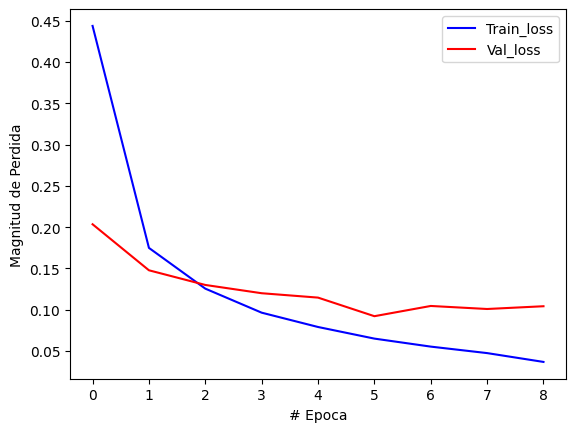

In [138]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de Perdida")
plt.plot(model.history['loss'],'b', label='Train_loss')
plt.plot(model.history['val_loss'], 'r', label='Val_loss')
plt.legend(loc='upper right')
plt.show()

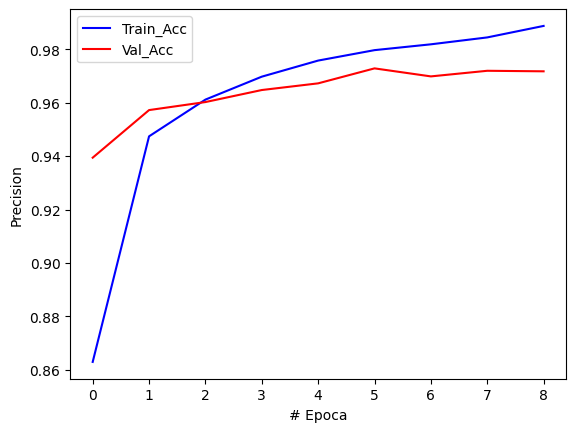

In [139]:
plt.xlabel("# Epoca")
plt.ylabel("Precision")
plt.plot(model.history['accuracy'], 'b', label = 'Train_Acc')
plt.plot(model.history['val_accuracy'], 'r', label = 'Val_Acc')
plt.legend(loc='upper left')
plt.show()

#### Optmizacion

In [140]:
modelos = {}
# Learning Rate  en el intervalo [0.001 , 1]

for i in range(10):
    j = -3*np.random.rand() #[0,1]
    lr = 10**j
    modelo1 = Sequential()
    modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal", input_dim = num_pixels))
    modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
    modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
    modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
    modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
    modelo1.add(Dense(10, activation  = 'softmax'))

    modelo1.compile(optimizer= Adam(learning_rate=  lr), loss='categorical_crossentropy', metrics=['accuracy'])

    EarlyStopping_monitor = EarlyStopping(patience = 3, monitor= "val_loss")
    model1 = modelo1.fit(x_train,y_train, validation_data= (x_valid,y_valid),batch_size= 512, epochs = 100 ,callbacks= [EarlyStopping_monitor])
    
    mean_accu_train = np.mean(model1.history['accuracy'])
    print(f'con Lr: {lr}'' | ''Accuracy: {:.2f}'.format(mean_accu_train))
    print()

    modelos[lr] = modelo1.evaluate(x_test, y_test)[1], mean_accu_train




Epoch 1/100
98/98 [==============================] - 1s 11ms/step - loss: 5864586.5000 - accuracy: 0.1031 - val_loss: 3992.5935 - val_accuracy: 0.1070
Epoch 2/100
98/98 [==============================] - 1s 9ms/step - loss: 1278.6599 - accuracy: 0.1032 - val_loss: 716.7288 - val_accuracy: 0.0978
Epoch 3/100
98/98 [==============================] - 1s 8ms/step - loss: 748.2202 - accuracy: 0.1008 - val_loss: 759.4911 - val_accuracy: 0.1032
Epoch 4/100
98/98 [==============================] - 1s 9ms/step - loss: 916.6728 - accuracy: 0.0981 - val_loss: 1047.7389 - val_accuracy: 0.0980
Epoch 5/100
98/98 [==============================] - 1s 9ms/step - loss: 726.4902 - accuracy: 0.0990 - val_loss: 634.1780 - val_accuracy: 0.1070
Epoch 6/100
98/98 [==============================] - 1s 9ms/step - loss: 707.1460 - accuracy: 0.1006 - val_loss: 678.3685 - val_accuracy: 0.1070
Epoch 7/100
98/98 [==============================] - 1s 10ms/step - loss: 791.8491 - accuracy: 0.0988 - val_loss: 592.7020

In [141]:
#Resultados de las interaciones buscndo el mejor LearningRate ordenado de mayor a menor precision.

modelos_top = sorted(modelos.items(), key= lambda x: x[1], reverse= True)

modelos_top

#LR|Acc_Test|Acc_Train

[(0.002859439362836218, (0.974399983882904, 0.9650924876332283)),
 (0.0017140098401237614, (0.9722999930381775, 0.9663511117299398)),
 (0.0048903858345949935, (0.9699000120162964, 0.9681720018386841)),
 (0.0024709802096480817, (0.9672999978065491, 0.9648900032043457)),
 (0.011471484837508854, (0.9638000130653381, 0.9468657118933541)),
 (0.07121857834014524, (0.9369999766349792, 0.832223529324812)),
 (0.07618509990263674, (0.9284999966621399, 0.8471715889478985)),
 (0.1844465588349978, (0.11349999904632568, 0.10397142916917801)),
 (0.7924756368411539, (0.09740000218153, 0.10413800030946732)),
 (0.9355793450081237, (0.09740000218153, 0.10278153935304055))]

#### Comparando modelos 

In [142]:
lr = modelos_top[1][0]

modelo1= Sequential()
modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal", input_dim = num_pixels))
modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo1.add(Dense(100, activation  = 'ELU',kernel_initializer = "he_normal"))
modelo1.add(Dense(10, activation  = 'softmax'))

modelo1.compile(optimizer= Adam(learning_rate=  lr), loss='categorical_crossentropy', metrics=['accuracy'])

EarlyStopping_monitor = EarlyStopping(patience = 3, monitor= "val_loss")
model1 = modelo1.fit(x_train,y_train, validation_data= (x_valid,y_valid),batch_size= 512, epochs = 100 ,callbacks= [EarlyStopping_monitor])


Epoch 1/100
98/98 [==============================] - 2s 11ms/step - loss: 0.3871 - accuracy: 0.8813 - val_loss: 0.1802 - val_accuracy: 0.9465
Epoch 2/100
98/98 [==============================] - 1s 9ms/step - loss: 0.1470 - accuracy: 0.9554 - val_loss: 0.1432 - val_accuracy: 0.9579
Epoch 3/100
98/98 [==============================] - 1s 9ms/step - loss: 0.1067 - accuracy: 0.9676 - val_loss: 0.1205 - val_accuracy: 0.9643
Epoch 4/100
98/98 [==============================] - 1s 9ms/step - loss: 0.0844 - accuracy: 0.9733 - val_loss: 0.1061 - val_accuracy: 0.9671
Epoch 5/100
98/98 [==============================] - 1s 9ms/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 6/100
98/98 [==============================] - 1s 9ms/step - loss: 0.0549 - accuracy: 0.9813 - val_loss: 0.0914 - val_accuracy: 0.9726
Epoch 7/100
98/98 [==============================] - 1s 9ms/step - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.0872 - val_accuracy: 0.9758
Epoch 8/100


In [143]:
# Final evaluacion del model1
scores = modelo1.evaluate(x_test, y_test)
print("Error de linea base: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9692
Error de linea base: 3.08%


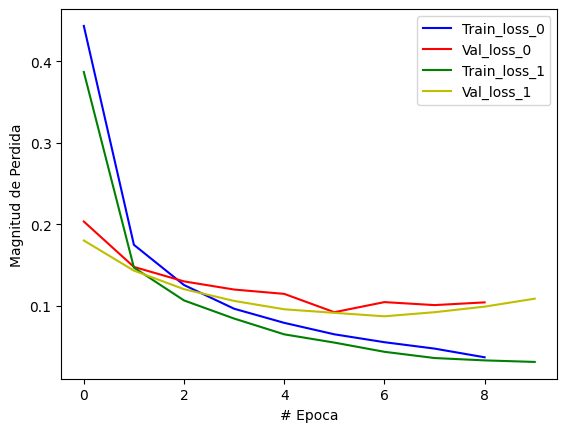

In [144]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de Perdida")
plt.plot(model.history['loss'],'b', label='Train_loss_0')
plt.plot(model.history['val_loss'], 'r', label='Val_loss_0')
plt.plot(model1.history['loss'],'g', label='Train_loss_1')
plt.plot(model1.history['val_loss'], 'y', label='Val_loss_1')
plt.legend(loc='upper right')
plt.show()

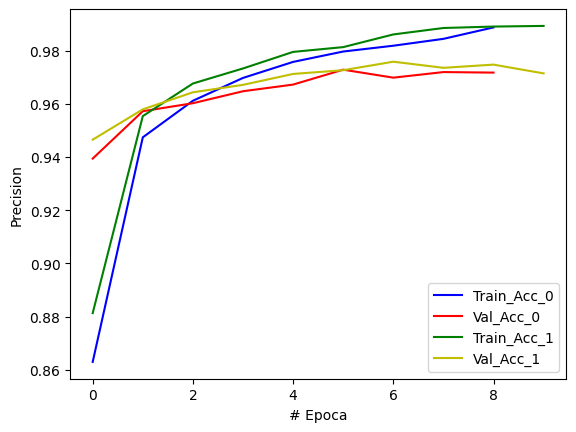

In [145]:
plt.xlabel("# Epoca")
plt.ylabel("Precision")
plt.plot(model.history['accuracy'], 'b', label = 'Train_Acc_0')
plt.plot(model.history['val_accuracy'], 'r', label = 'Val_Acc_0')
plt.plot(model1.history['accuracy'], 'g', label = 'Train_Acc_1')
plt.plot(model1.history['val_accuracy'], 'y', label = 'Val_Acc_1')
plt.legend(loc='lower right')
plt.show()

#### Validacion de la prediccion del modelo.

313/313 [==============================] - 1s 2ms/step
Predicion es el numero:  8


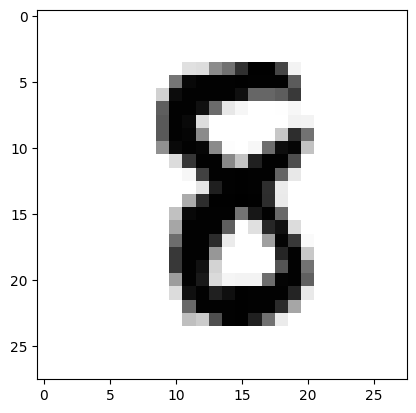

In [146]:
#Especificamos el numero de la imagen en el conjunto de datos de prueba y lo graficamos.
image = 181
imagen_test = plt.imshow(x_test.reshape([10000,28,28])[image], cmap=plt.cm.binary)

#Arrojamos la predicion del modelo con el conjunto de datos de prueba en la prediccion del numero de imagen espeficicado.
prediction = modelo1.predict(x_test)
print("Predicion es el numero: ", np.argmax(prediction[image]) )